## Predicting Survival in the Titanic Data Set  
We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.  
Loading Data and modules. 


In [4]:
import numpy as np
import pandas as pd


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from sklearn import metrics
import statsmodels.api as sm
#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [7]:
df=pd.read_csv('titanic.csv')
print(df.head(1))
print(df.shape)
print(df.isnull().sum()/df.shape[0])


   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  
(891, 12)
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Dropped columns not useful

In [10]:
#You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived. 
df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'],inplace=True)

In [11]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.25


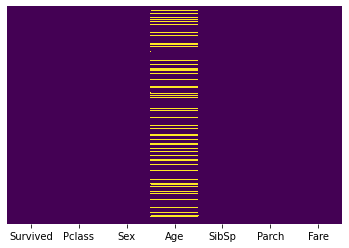

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

## Handling Missing data in Age

In [14]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.25


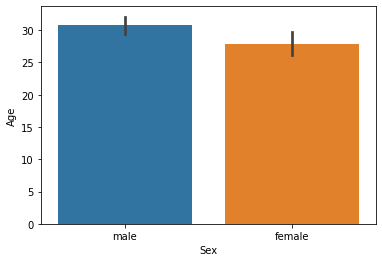

In [15]:
sns.barplot(x='Sex',y='Age',data=df)

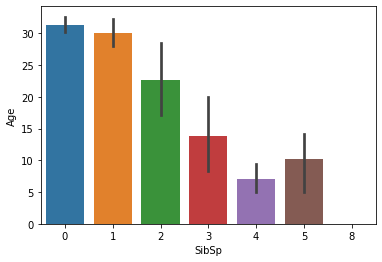

In [16]:
sns.barplot(x='SibSp',y='Age',data=df)

In [17]:
df['Age'].median()

28.0

In [18]:
df[df['SibSp']==8].count()

Survived    7
Pclass      7
Sex         7
Age         0
SibSp       7
Parch       7
Fare        7
dtype: int64

## We can see that Sibsp for 8 we  have no age, so filling that age with whole df median i.e 28.0.

In [19]:
df['Age']=np.where((df['SibSp']==8)&(df['Age'].isnull()),28.0,df['Age'])

In [20]:
df[df['SibSp']==8].count()

Survived    7
Pclass      7
Sex         7
Age         7
SibSp       7
Parch       7
Fare        7
dtype: int64

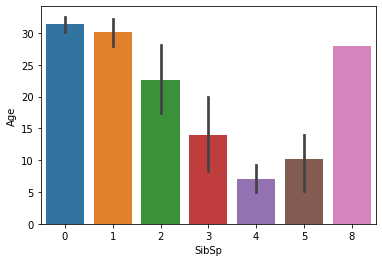

In [21]:
sns.barplot(x='SibSp',y='Age',data=df)

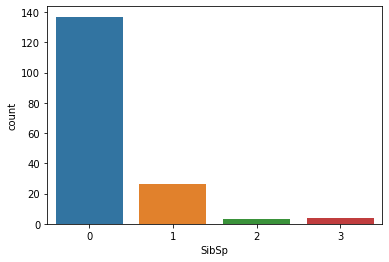

In [22]:
sns.countplot(x='SibSp',data=df[df['Age'].isnull()])

In [19]:
## using groupby to see what are the median values for Age for Paticulat SibSp .

In [23]:
df.groupby('SibSp')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,471.0,31.397558,13.647767,0.42,22.00,29.0,39.00,80.0
1,183.0,30.089727,14.645033,0.67,20.00,30.0,39.00,70.0
2,25.0,22.620000,14.679230,0.75,16.00,23.0,28.00,53.0
3,12.0,13.916667,11.317391,2.00,3.75,9.5,23.25,33.0
4,18.0,7.055556,4.880601,1.00,3.25,6.5,9.00,17.0
5,5.0,10.200000,5.805170,1.00,9.00,11.0,14.00,16.0
8,7.0,28.000000,0.000000,28.00,28.00,28.0,28.00,28.0


In [24]:
df['Age']=np.where((df['SibSp']==0)&(df['Age'].isnull()),29.0,df['Age'])
df['Age']=np.where((df['SibSp']==1)&(df['Age'].isnull()),30.0,df['Age'])
df['Age']=np.where((df['SibSp']==2)&(df['Age'].isnull()),23.0,df['Age'])
df['Age']=np.where((df['SibSp']==3)&(df['Age'].isnull()),10.0,df['Age'])
                   

In [25]:
df['Age'].isnull().sum()

0

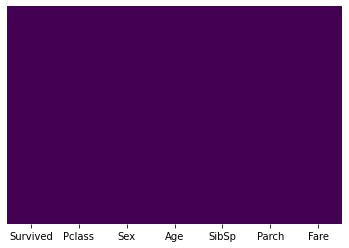

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Handling Outliers

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


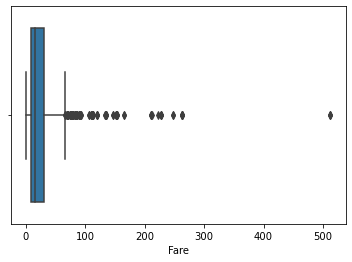

In [28]:
sns.boxplot(df['Fare'])

In [29]:
df.shape

(891, 7)

In [30]:
df[df['Fare']>300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
258,1,1,female,35.0,0,0,512.3292
679,1,1,male,36.0,0,1,512.3292
737,1,1,male,35.0,0,0,512.3292


In [31]:
df.drop(index=[258,679,737],inplace=True)

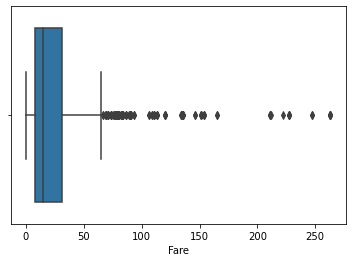

In [32]:
sns.boxplot(df['Fare'])

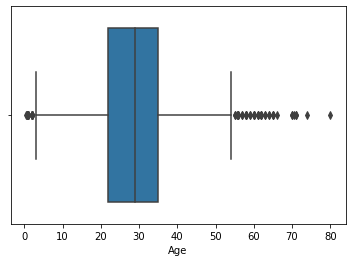

In [33]:
sns.boxplot(df['Age'])

In [34]:
df[df['Age']>75]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
630,1,1,male,80.0,0,0,30.0


In [35]:
df.drop(index=630,inplace=True)

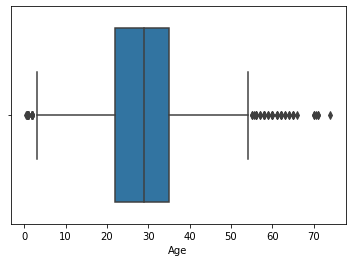

In [36]:
sns.boxplot(df['Age'])

## Converting categorical to numerical data

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   Parch     887 non-null    int64  
 6   Fare      887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.4+ KB


In [38]:
sex_dummies=pd.get_dummies(df['Sex'],drop_first=True)
print(sex_dummies.head(1),)

   male
0     1


In [39]:
df.drop(columns=['Sex'],inplace=True)

In [40]:
df.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.25


In [42]:
df_new=pd.concat([df,sex_dummies],axis=1)

In [44]:
df_new.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0


In [45]:
df_new.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

## Model Building

In [54]:
X=df_new.drop(columns=['Survived']).values
y=df_new['Survived'].values

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, 
                                                    random_state=101)

In [56]:
x_train.shape

(665, 6)

In [57]:
x_test.shape

(222, 6)

In [58]:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
py_pred = clf.predict(x_test)

In [60]:
print("train:",clf.score(x_train,y_train))
print("test:",clf.score(x_test,y_test))

train: 0.9819548872180451
test: 0.7837837837837838


## We can clearly see the overfitting of our model.

### hyperparameter selection now to solve overfitting.

In [61]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
model_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [62]:
from sklearn import*
#grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1)
random_search_object=model_selection.RandomizedSearchCV(clf,model_params,n_iter=10,cv=5,random_state=15)

In [63]:
random_search_best_model=random_search_object.fit(x_train,y_train)

In [64]:

Y_pred_test = random_search_best_model.predict(x_test)
Y_pred_train = random_search_best_model.predict(x_train)

print('Accuracy Train:',metrics.accuracy_score(y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(y_test,Y_pred_test))

Accuracy Train: 0.8285714285714286
Accuracy Test: 0.7747747747747747


## now we are getting better accuracy using hyperparameter.

In [65]:
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
print('Area under ROC curve:',roc_auc)

Area under ROC curve: 0.7648361004682844


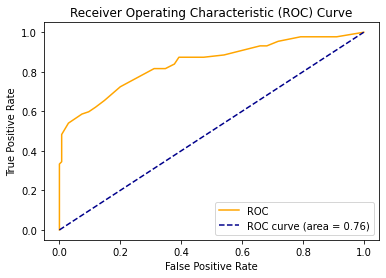

In [67]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()